In [16]:
!pip freeze > requirements.txt

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
sns.set_style("darkgrid")
sns.set(font_scale=1.2)
%matplotlib inline
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pickle
import joblib

import scipy
import scipy.stats
from numpy import mean, square, sqrt
from scipy.stats import kurtosis
from scipy.stats import skew
from collections import Counter
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import gstd
from scipy.stats import skew
from scipy.stats import iqr
from scipy.stats import sem
import random
import math as m
import warnings
warnings.filterwarnings('ignore')
from time import time
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-notebook')

In [11]:
motor_arr= [
    'data/03_08/VIB_0308_motor_51200.csv',
    'data/03_10/VIB_0310_motor_51200.csv',
    'data/03_11/VIB_0311_motor_51200.csv',
    'data/03_14/VIB_0314_motor_51200.csv',
    'data/03_16/VIB_0316_motor_51200.csv',
    'data/03_17/VIB_0317_motor_51200.csv',
    'data/03_21/VIB_0321_motor_51200.csv',
    'data/03_23/VIB_0323_motor_51200.csv',
    'data/03_24/VIB_0324_motor_51200.csv',
    'data/03_28/VIB_0328_motor_51200.csv',
    'data/03_04/VIB_0304_motor_51200.csv',
    'data/03_30/VIB_0330_motor_51200.csv',
    'data/03_31/VIB_0331_motor_51200.csv'
]

In [12]:
pump_arr= [
    'data/03_08/VIB_0308_pump_51200.csv',
    'data/03_10/VIB_0310_pump_51200.csv',
    'data/03_11/VIB_0311_pump_51200.csv',
    'data/03_14/VIB_0314_pump_51200.csv',
    'data/03_16/VIB_0316_pump_51200.csv',
    'data/03_17/VIB_0317_pump_51200.csv',
    'data/03_21/VIB_0321_pump_51200.csv',
    'data/03_23/VIB_0323_pump_51200.csv',
    'data/03_24/VIB_0324_pump_51200.csv',
    'data/03_28/VIB_0328_pump_51200.csv',    
    'data/03_04/VIB_0304_pump_51200.csv',
    'data/03_30/VIB_0330_pump_51200.csv',
    'data/03_31/VIB_0331_pump_51200.csv'
    
]

In [32]:
class Model:
    columns = ['Mean', 'RMS', 'VAR', 'STD', 'GSTD','IQR', 'SEM', 'MAX_H', 'MIN_H','KUR', 'SKEW', 'CF']
    def __init__(self,value,is_init):
        if is_init is True:
            self.__clf = LocalOutlierFactor(n_neighbors=value,novelty=True)
        else:
            self.__clf = joblib.load(value)
        
    def save_model(self,filepath):
        if self.__clf is not None :
            joblib.dump(self.__clf, filepath)
            
    @classmethod
    def load_model(cls,filepath):
        return cls(filepath,False)
    
    @classmethod
    def init_model(cls,n_neighbors=1000):
        return cls(n_neighbors,True)
            
    def __extract_feature(self,Hss):

        s, size = Hss.shape

        a = [] #create an empty list

        for i in range(size):  #run a loop to compute every signal in the variable
            x = np.mean(Hss[:, i])  #compute mean for each signal
            a.append(x)  #store the value to empty array

        Mean_H = np.array(a) #convert list to array
        Mean_H.shape

        a = [] #create an empty list

        for i in range(size):  #run a loop to compute every signal in the variable
            x = np.max(Hss[:, i])  #compute max for each signal
            a.append(x)  #store the value to empty array

        MAX_H = np.array(a) #convert list to array
        MAX_H.shape

        a = [] #create an empty list

        for i in range(size):  #run a loop to compute every signal in the variable
            x = np.min(Hss[:, i])  #compute min for each signal
            a.append(x)  #store the value to empty array

        MIN_H = np.array(a) #convert list to array
        MIN_H.shape

        a = [] #create an empty list

        for i in range(size):  #run a loop to compute every signal in the variable
            x = sqrt(mean(square(Hss[:, i])))  #compute rms for each signal
            a.append(x)  #store the value to empty array

        RMS_H = np.array(a) #convert list to array
        RMS_H.shape

        a = [] #create an empty list

        for i in range(size):  #run a loop to compute every signal in the variable
            x = np.std(Hss[:, i])  #compute standard deviation(표준편차) for each signal
            a.append(x)  #store the value to empty array

        STD_H = np.array(a) #convert list to array
        STD_H.shape

        a = [] #create an empty list

        for i in range(size):  #run a loop to compute every signal in the variable
            x = np.var(Hss[:, i])  #compute Variance for each signal
            a.append(x)  #store the value to empty array

        VAR_H = np.array(a) #convert list to array
        VAR_H.shape


        a = [] #create an empty list

        for i in range(size):  #run a loop to compute every signal in the variable
            x = kurtosis(Hss[:, i])  #compute Kurtosis for each signal
            a.append(x)  #store the value to empty array

        KUR_H = np.array(a) #convert list to array
        KUR_H.shape


        a = [] #create an empty list

        for i in range(size):  #run a loop to compute every signal in the variable
            x = skew(Hss[:, i])  #compute Skewness for each signal
            a.append(x)  #store the value to empty array

        SKEW_H = np.array(a) #convert list to array
        SKEW_H.shape

        a = [] #create an empty list

        for i in range(size):  #run a loop to compute every signal in the variable
            x = gstd(abs(Hss[:, i]))  #compute GSTD for each signal
            a.append(x)  #store the value to empty array

        GSTD_H = np.array(a) #convert list to array
        GSTD_H.shape

        a = [] #create an empty list

        for i in range(size):  #run a loop to compute every signal in the variable
            x = iqr(Hss[:, i])  #compute IQR for each signal
            a.append(x)  #store the value to empty array

        IQR_H = np.array(a) #convert list to array
        IQR_H.shape

        a = [] #create an empty list

        for i in range(size):  #run a loop to compute every signal in the variable
            x = sem(Hss[:, i])  #compute SEM for each signal
            a.append(x)  #store the value to empty array

        SEM_H = np.array(a) #convert list to array
        SEM_H.shape

        #from scipy.stats import median_abs_deviation

        #a = [] #create an empty list

        #for i in range(size):  #run a loop to compute every signal in the variable
        #    x = median_abs_deviation(Hss[:, i])  #compute MAD for each signal
        #    a.append(x)  #store the value to empty array

        #MAD_H = np.array(a) #convert list to array
        #MAD_H.shape

        a = [] #create an empty list

        for i in range(size):  #run a loop to compute every signal in the variable
            x = max(Hss[:, i])/RMS_H[i]  #compute Crest Factor for each signal
            a.append(x)  #store the value to empty array

        CF_H = np.array(a) #convert list to array
        CF_H.shape

        Motor_FT= pd.DataFrame([Mean_H, RMS_H, VAR_H, STD_H,
                                   GSTD_H, IQR_H, SEM_H, MAX_H, MIN_H,
                                   KUR_H, SKEW_H, CF_H]).T

        Motor_FT.columns=Model.columns
        #Motor_FT['State'] = 0

        return Motor_FT
    
    def __feature_process(self,data_frame,batch_size=5110):
        before = 0
        train_data = pd.DataFrame(np.zeros((1,12)),columns = Model.columns)
        
        if len(data_frame) <= batch_size:
            features = self.__extract_feature(data_frame.to_numpy().reshape(-1,1))
            return features
            
        for i in tqdm(range(batch_size,len(data_frame),batch_size)):
            features = self.__extract_feature(data_frame[before:i].to_numpy().reshape(-1,1))
            before = i
            train_data = train_data.append(features,ignore_index=True)

        return train_data[1:]
    
    
    
    def predict(self,data_frame):
        df = self.__feature_process(data_frame)
        return (self.__clf.predict(df), self.__clf.decision_function(df).reshape(-1,1))
    
    def training(self,data_frame):
        self.__clf.fit(data_frame)

In [33]:
clf = Model.init_model()

In [15]:
clf = Model.load_model('motor_tmp.pkl')

In [5]:
train_data = pd.read_csv('11features_without_PCA_pump.csv',encoding = 'cp949')

In [34]:
clf.training(train_data)

In [9]:
valid_data = \
    pd.read_csv('data/03_04/VIB_0304_pump_51200.csv',sep = '\t',names = ['time', 'data'], header = None, encoding = 'CP949').iloc[:47962461,1]

In [39]:
y_pred,scores = clf.predict(valid_data)

100%|█████████████████████████████████████████████████████████████████████████████| 4726/4726 [00:08<00:00, 535.95it/s]


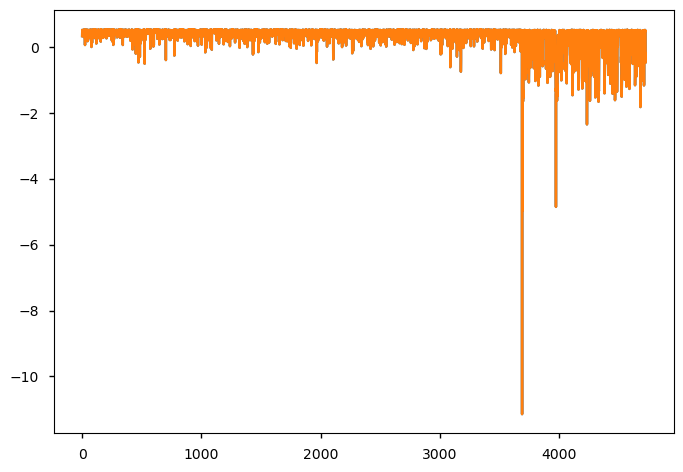

In [42]:
plt.plot(scores)
plt.show()

In [54]:
count = 0
for i in y_pred:
    if i == 1 : count+=1
print("정확도 : ",count/len(y_pred))


정확도 :  0.8999153618281845


In [55]:
clf.save_model('pump_tmp.pkl')

In [ ]:
def get_anomaly_scores(clf,data):
    return clf.decision_function(data).reshape(-1,1)

In [27]:
def collection(filepath):
    columns = ['Mean','RMS','VAR','STD','GSTD','IQR','SEM','MAX_H','MIN_H','KUR','SKEW', 'CF']
    df = pd.DataFrame(np.zeros((1,12)),columns = columns)
    for i,file1 in enumerate(filepath):
        vib1 = pd.read_csv(file1, sep = '\t', names = ['time', 'data'],
                                 header = None, encoding = 'CP949').iloc[:47962461,1]
        data = []
        for value in vib1[:]:
            if int(value) != 0 : 
                data.append(value)
        vib1 = pd.DataFrame(data,columns = ['x1'])
        plt.plot(vib1.index,vib1,color='blue')
        plt.savefig('sampling/motor/' + file1[-6:-4]+'.png')
        plt.show()
        plt.clf()
        plt.close('all')
        vib1_features = feature_process(vib1)
        df = df.append(pd.DataFrame(vib1_features,columns = columns))
                
    return df

# Validation

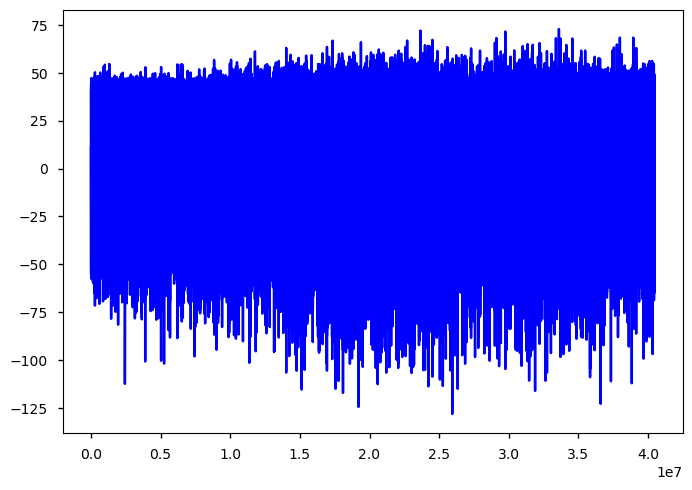

100%|█████████████████████████████████████████████████████████████████████████████| 7921/7921 [00:14<00:00, 541.58it/s]


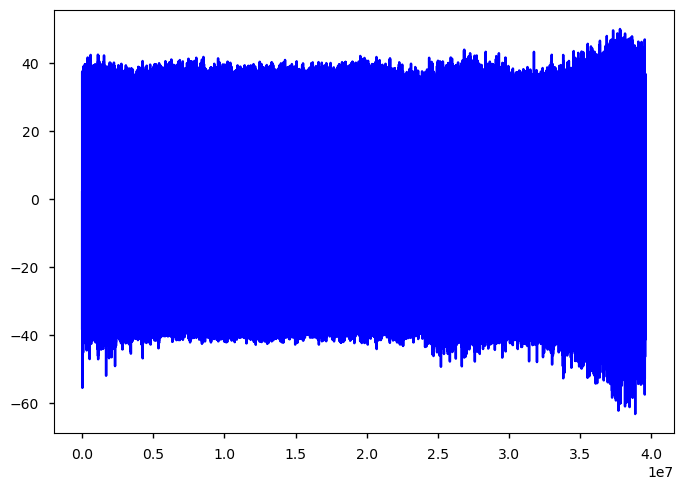

100%|█████████████████████████████████████████████████████████████████████████████| 7750/7750 [00:14<00:00, 544.21it/s]


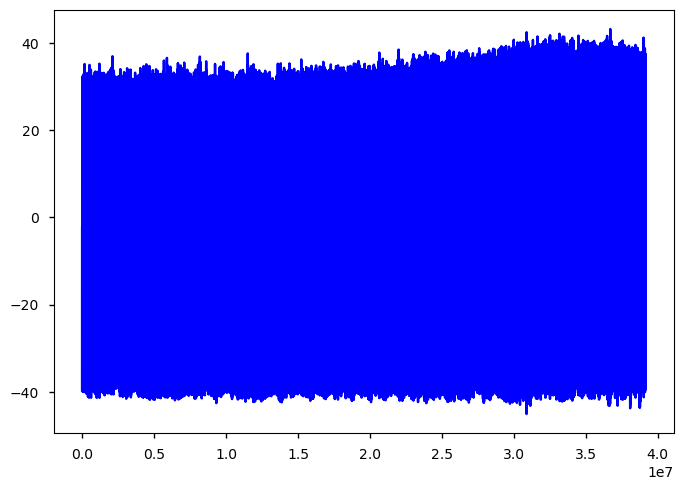

100%|█████████████████████████████████████████████████████████████████████████████| 7663/7663 [00:14<00:00, 539.57it/s]


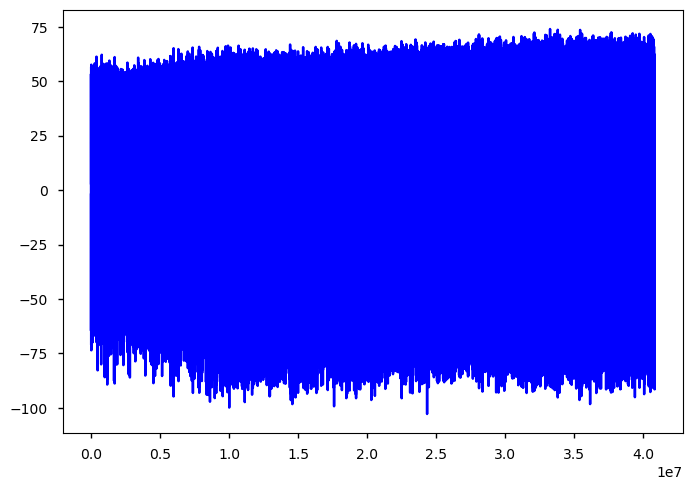

100%|█████████████████████████████████████████████████████████████████████████████| 7991/7991 [00:14<00:00, 541.47it/s]


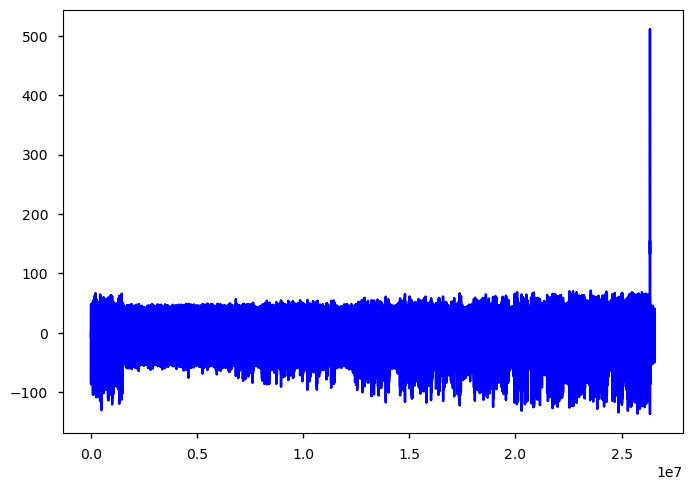

100%|█████████████████████████████████████████████████████████████████████████████| 5197/5197 [00:09<00:00, 549.48it/s]


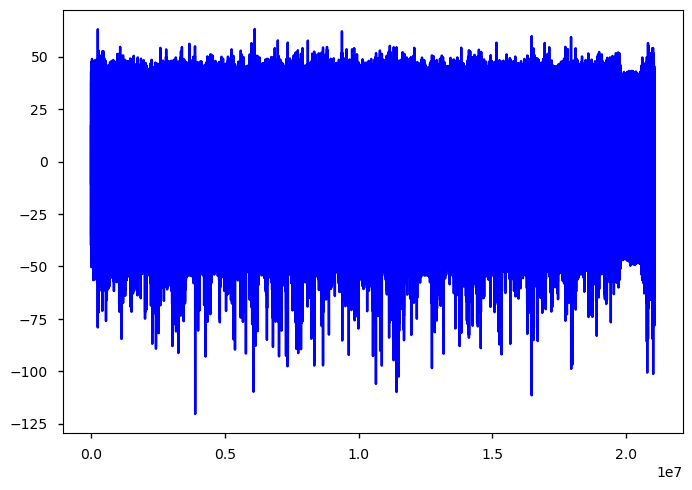

100%|█████████████████████████████████████████████████████████████████████████████| 4122/4122 [00:07<00:00, 542.79it/s]


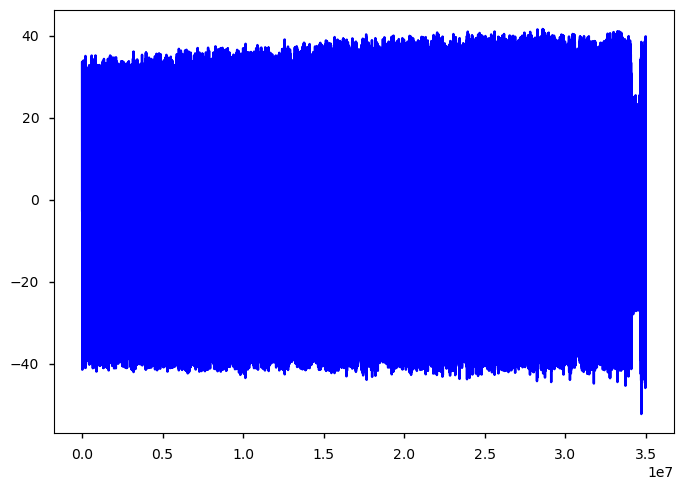

100%|█████████████████████████████████████████████████████████████████████████████| 6848/6848 [00:12<00:00, 536.08it/s]


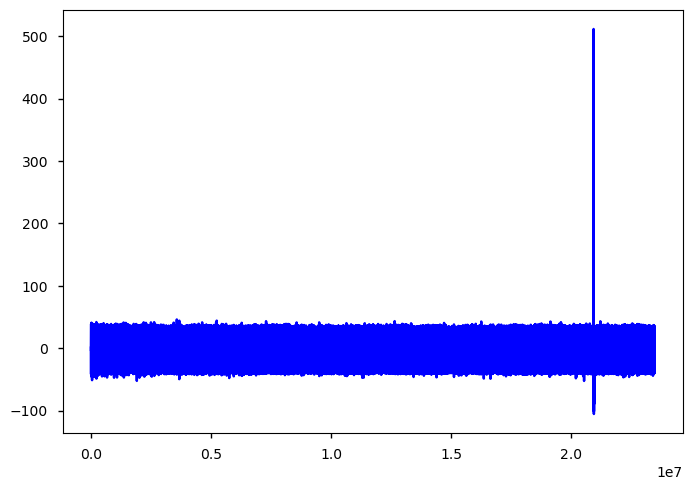

100%|█████████████████████████████████████████████████████████████████████████████| 4591/4591 [00:08<00:00, 543.63it/s]


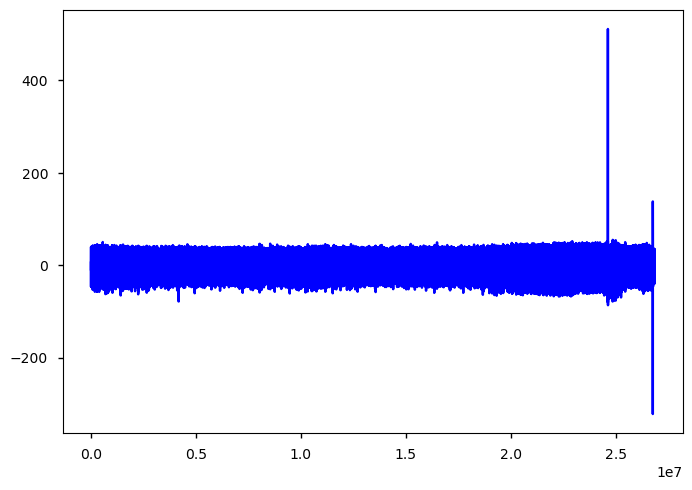

100%|█████████████████████████████████████████████████████████████████████████████| 5253/5253 [00:09<00:00, 539.15it/s]


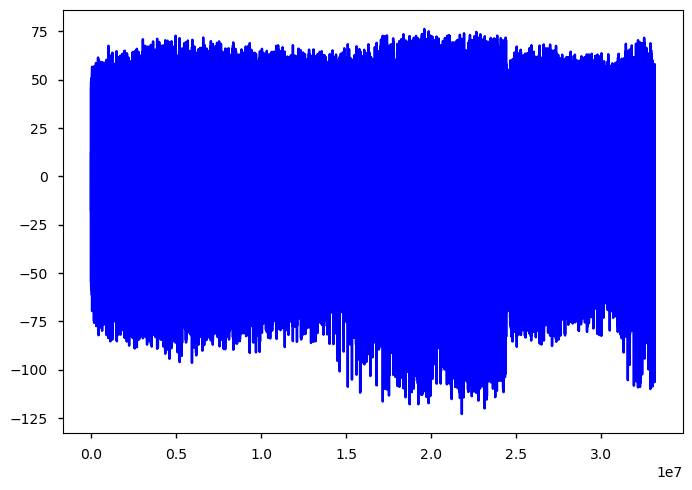

100%|█████████████████████████████████████████████████████████████████████████████| 6484/6484 [00:11<00:00, 541.24it/s]


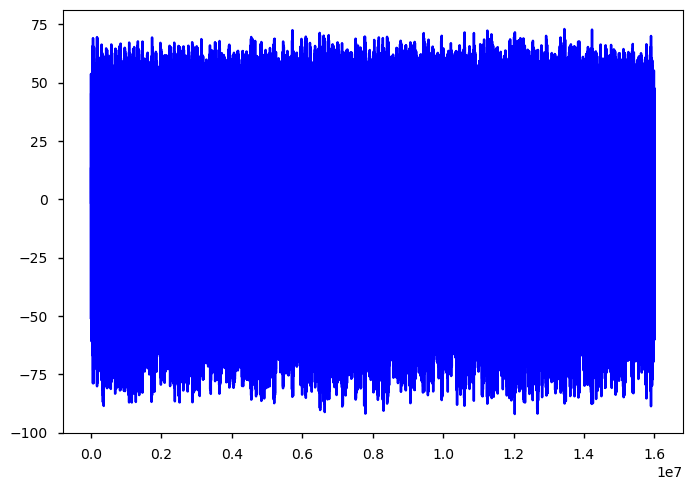

100%|█████████████████████████████████████████████████████████████████████████████| 3132/3132 [00:05<00:00, 549.79it/s]


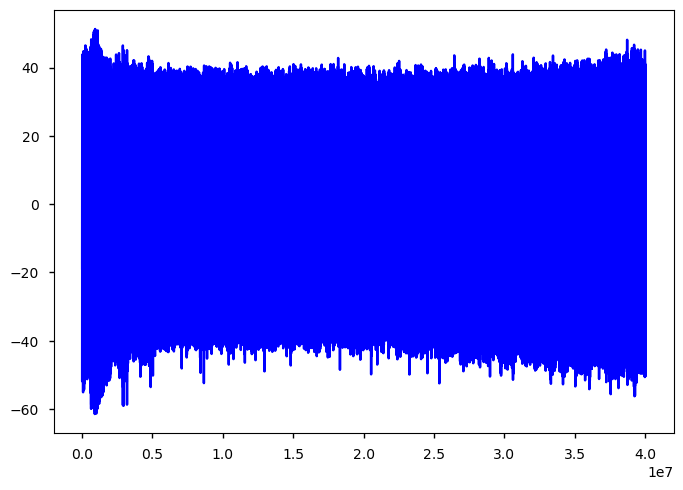

100%|█████████████████████████████████████████████████████████████████████████████| 7838/7838 [00:15<00:00, 517.54it/s]


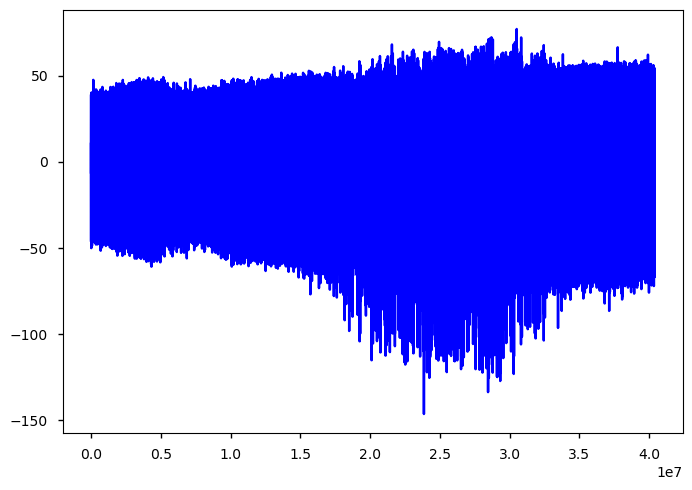

100%|█████████████████████████████████████████████████████████████████████████████| 7904/7904 [00:14<00:00, 535.44it/s]


In [33]:
df = collection(pump_arr)

In [34]:
df.head()

,Mean,RMS,VAR,STD,GSTD,IQR,SEM,MAX_H,MIN_H,KUR,SKEW,CF
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.220278,9.218783,84.937432,9.216151,2.293448,10.462791,0.128938,38.946312,-44.751667,1.686764,-0.273835,4.224670
2,-0.070475,9.705864,94.198820,9.705608,2.308520,11.546847,0.135786,44.413090,-55.351431,1.571370,-0.320573,4.575903
3,-0.031059,9.982418,99.647703,9.982370,2.324186,11.891627,0.139658,40.348700,-52.797611,1.093007,-0.163308,4.041977
4,0.058353,10.153040,103.080818,10.152872,2.310501,11.964192,0.142043,47.229253,-57.584500,1.315822,-0.245639,4.651735


In [35]:
df.to_csv("pump_train_data.csv",encoding = 'cp949',index = False)

In [29]:
def extract_feature(Hss):

    s, size = Hss.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = np.mean(Hss[:, i])  #compute mean for each signal
        a.append(x)  #store the value to empty array

    Mean_H = np.array(a) #convert list to array
    Mean_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = np.max(Hss[:, i])  #compute max for each signal
        a.append(x)  #store the value to empty array

    MAX_H = np.array(a) #convert list to array
    MAX_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = np.min(Hss[:, i])  #compute min for each signal
        a.append(x)  #store the value to empty array

    MIN_H = np.array(a) #convert list to array
    MIN_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = sqrt(mean(square(Hss[:, i])))  #compute rms for each signal
        a.append(x)  #store the value to empty array

    RMS_H = np.array(a) #convert list to array
    RMS_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = np.std(Hss[:, i])  #compute standard deviation(표준편차) for each signal
        a.append(x)  #store the value to empty array

    STD_H = np.array(a) #convert list to array
    STD_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = np.var(Hss[:, i])  #compute Variance for each signal
        a.append(x)  #store the value to empty array

    VAR_H = np.array(a) #convert list to array
    VAR_H.shape


    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = kurtosis(Hss[:, i])  #compute Kurtosis for each signal
        a.append(x)  #store the value to empty array

    KUR_H = np.array(a) #convert list to array
    KUR_H.shape


    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = skew(Hss[:, i])  #compute Skewness for each signal
        a.append(x)  #store the value to empty array

    SKEW_H = np.array(a) #convert list to array
    SKEW_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = gstd(abs(Hss[:, i]))  #compute GSTD for each signal
        a.append(x)  #store the value to empty array

    GSTD_H = np.array(a) #convert list to array
    GSTD_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = iqr(Hss[:, i])  #compute IQR for each signal
        a.append(x)  #store the value to empty array

    IQR_H = np.array(a) #convert list to array
    IQR_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = sem(Hss[:, i])  #compute SEM for each signal
        a.append(x)  #store the value to empty array

    SEM_H = np.array(a) #convert list to array
    SEM_H.shape

    #from scipy.stats import median_abs_deviation

    #a = [] #create an empty list

    #for i in range(size):  #run a loop to compute every signal in the variable
    #    x = median_abs_deviation(Hss[:, i])  #compute MAD for each signal
    #    a.append(x)  #store the value to empty array

    #MAD_H = np.array(a) #convert list to array
    #MAD_H.shape

    a = [] #create an empty list

    for i in range(size):  #run a loop to compute every signal in the variable
        x = max(Hss[:, i])/RMS_H[i]  #compute Crest Factor for each signal
        a.append(x)  #store the value to empty array

    CF_H = np.array(a) #convert list to array
    CF_H.shape

    Motor_FT= pd.DataFrame([Mean_H, RMS_H, VAR_H, STD_H,
                               GSTD_H, IQR_H, SEM_H, MAX_H, MIN_H,
                               KUR_H, SKEW_H, CF_H]).T

    Motor_FT.columns=Model.columns
    #Motor_FT['State'] = 0

    return Motor_FT

def feature_process(data_frame,batch_size=5110):
    before = 0
    train_data = pd.DataFrame(np.zeros((1,12)),columns = Model.columns)

    if len(data_frame) <= batch_size:
        features = extract_feature(data_frame.to_numpy().reshape(-1,1))
        return features

    for i in tqdm(range(batch_size,len(data_frame),batch_size)):
        features = extract_feature(data_frame[before:i].to_numpy().reshape(-1,1))
        before = i
        train_data = train_data.append(features,ignore_index=True)

    return train_data[1:]